In [1]:
import time
from datetime import datetime, timedelta, date
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI

In [2]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [3]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)

In [4]:
session = requests.session()

In [5]:
minute_history = api.polygon.historic_agg_v2(
    'CBLI', 1, 'minute', _from = date.today() - timedelta(days=30), to=date.today() + timedelta(days=1), limit=5000).df

In [13]:
low = minute_history[:4670]["low"]

In [14]:
series = low[-100:].dropna().resample("5min").min()

In [15]:
series

timestamp
2020-03-05 16:00:00-05:00    2.9000
2020-03-05 16:05:00-05:00       NaN
2020-03-05 16:10:00-05:00       NaN
2020-03-05 16:15:00-05:00       NaN
2020-03-05 16:20:00-05:00    2.9000
                              ...  
2020-03-06 10:10:00-05:00    3.2200
2020-03-06 10:15:00-05:00    3.3000
2020-03-06 10:20:00-05:00    3.3506
2020-03-06 10:25:00-05:00    3.4483
2020-03-06 10:30:00-05:00    3.5500
Freq: 5T, Name: low, Length: 223, dtype: float64

In [28]:
diff = np.diff(series.values)

In [29]:
diff

array([    nan,     nan,     nan,     nan,     nan,     nan,  0.05  ,
        0.    , -0.0599,  0.0599,  0.    ,  0.    ,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan, -0.09  ,     nan,     nan,  0.    ,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     

In [32]:
low_index = np.where((diff[:-1] <= 0) & (diff[1:] > 0))[0] + 1

<ipython-input-32-ef01cdcd5652>:1: RuntimeWarning: invalid value encountered in less_equal
  low_index = np.where((diff[:-1] <= 0) & (diff[1:] > 0))[0] + 1
<ipython-input-32-ef01cdcd5652>:1: RuntimeWarning: invalid value encountered in greater
  low_index = np.where((diff[:-1] <= 0) & (diff[1:] > 0))[0] + 1


In [33]:
low_index

array([  9, 192, 210])

In [35]:
low_index[-1]

210

In [38]:
series[210]

2.9

In [81]:
c_macd = MACD(data["close"]
                .dropna()
                .between_time("9:30", "16:00"),
                13,
                21,
            )

In [89]:
c_macd[0][-1]

0.01591870694289632

c_macd[1]

In [90]:
c_macd[1][-1]

0.019454334795311383

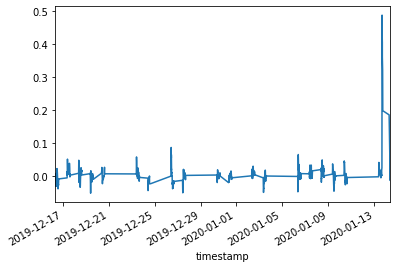

In [68]:
c_macd["close"].plot.line()

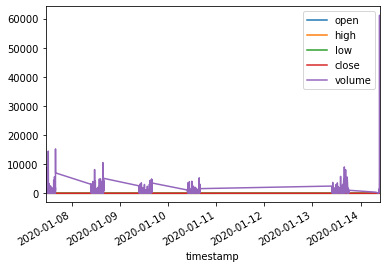

In [13]:
minute_history[:984].plot.line()

In [112]:
rsi = RSI(minute_history["close"][:4650].dropna()
                .between_time("9:30", "16:00"), 14)

In [107]:
minute_history[:988]["close"].dropna()

timestamp
2019-12-31 12:01:00-05:00    3.910
2019-12-31 12:02:00-05:00    3.910
2019-12-31 12:03:00-05:00    3.900
2019-12-31 12:04:00-05:00    3.900
2019-12-31 12:06:00-05:00    3.900
                             ...  
2020-01-06 14:30:00-05:00    3.895
2020-01-06 14:31:00-05:00    3.895
2020-01-06 14:32:00-05:00    3.900
2020-01-06 14:33:00-05:00    3.900
2020-01-06 14:34:00-05:00    3.890
Name: close, Length: 988, dtype: float64

In [113]:
rsi[-10:]

timestamp
2020-01-24 10:04:00-05:00    72.010047
2020-01-24 10:05:00-05:00    73.915696
2020-01-24 10:06:00-05:00    76.238624
2020-01-24 10:07:00-05:00    77.325904
2020-01-24 10:08:00-05:00    68.844573
2020-01-24 10:09:00-05:00    69.563603
2020-01-24 10:10:00-05:00    70.301726
2020-01-24 10:11:00-05:00    77.388284
2020-01-24 10:12:00-05:00    77.388284
2020-01-24 10:13:00-05:00    78.385233
dtype: float64

In [36]:
m = MACD(minute_history[:984]["close"].dropna(), 12, 26)

In [37]:
m[0]

timestamp
2020-01-07 11:00:00-05:00         NaN
2020-01-07 11:02:00-05:00         NaN
2020-01-07 11:03:00-05:00         NaN
2020-01-07 11:05:00-05:00         NaN
2020-01-07 11:06:00-05:00         NaN
                               ...   
2020-01-14 09:50:00-05:00    0.058693
2020-01-14 09:51:00-05:00    0.062310
2020-01-14 09:52:00-05:00    0.062838
2020-01-14 09:53:00-05:00    0.063333
2020-01-14 09:54:00-05:00    0.073370
Length: 984, dtype: float64

In [16]:
print(m[0][-1])

0.0018392903708512875


m[0]

m[0][-1]

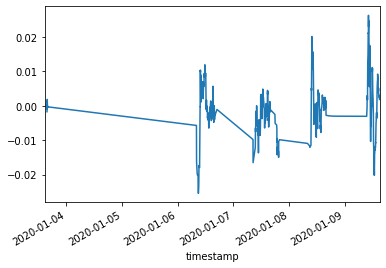

In [15]:
m[0].plot.line()

In [17]:
hist = MACD(minute_history["close"].dropna(), 40, 60)[0]

In [18]:
hist

timestamp
2020-01-03 14:46:00-05:00         NaN
2020-01-03 14:47:00-05:00         NaN
2020-01-03 14:49:00-05:00         NaN
2020-01-03 14:50:00-05:00         NaN
2020-01-03 15:01:00-05:00         NaN
                               ...   
2020-01-09 15:08:00-05:00   -0.000049
2020-01-09 15:09:00-05:00   -0.000229
2020-01-09 15:14:00-05:00   -0.000235
2020-01-09 15:15:00-05:00   -0.000319
2020-01-09 15:16:00-05:00   -0.000397
Length: 1000, dtype: float64

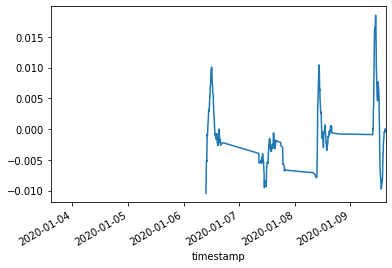

In [19]:
hist.plot.line()

In [20]:
if hist[-1] < 0 or np.diff(hist)[-1] < 0:
    print("no")

no


In [21]:
np.diff(hist)[-10:]

array([ 1.09757740e-04,  1.45968048e-04, -2.56688786e-05, -2.81157863e-06,
       -2.33610015e-05, -1.50406408e-05, -1.80092495e-04, -5.38795561e-06,
       -8.45496121e-05, -7.72776301e-05])

In [22]:
np.diff(hist)[-1]

-7.727763008613664e-05